<a href="https://colab.research.google.com/github/McNealFielies/Machine-Learning-Projects/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Student performance is a multi-factor phenomenon, which might have been influenced by individual characteristics, socio-economic status, and features of the educational environment. This requires an understanding of these influences from educators, policymakers, and other stakeholders to improve student achievement with equity in access to quality education.

This analysis studies various factors that contribute to students' exam scores, using a Linear Regression model to quantify relationships of independent variables-hours studied, attendance, parental involvement, and socio-economic indicators-on the dependent variable, exam scores. From this analysis, we seek to isolate key drivers of academic success and point out areas where remedies may be usefully applied.

In an era where equity in education and improvement in the attainment of students are at the fore, such an analysis may provide insights useful in supporting low-achieving students and fostering an enabling atmosphere of learning. We seek to use a data-driven approach to inform the continuing debate on improving educational practices and policies in service of the interests of all students.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [7]:
# Filling missing values in categorical columns with the mode (most frequent value)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

# Filling missing values in Teacher_Quality with mode (most frequent value)
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)

# Filling missing values in Parental_Education_Level with mode (most frequent value)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)

# Confirm that all missing values have been handled
print(df.isnull().sum())


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


<ipython-input-7-2265e3429e12>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## **Data Analysis**

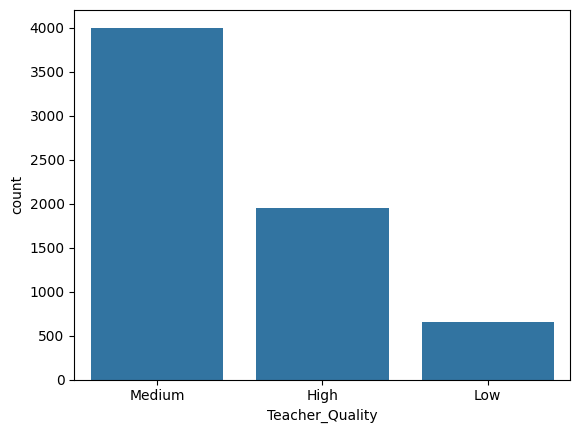

In [10]:
# Example: Count plot for Teacher Quality
sns.countplot(x='Teacher_Quality', data=df)
plt.show()

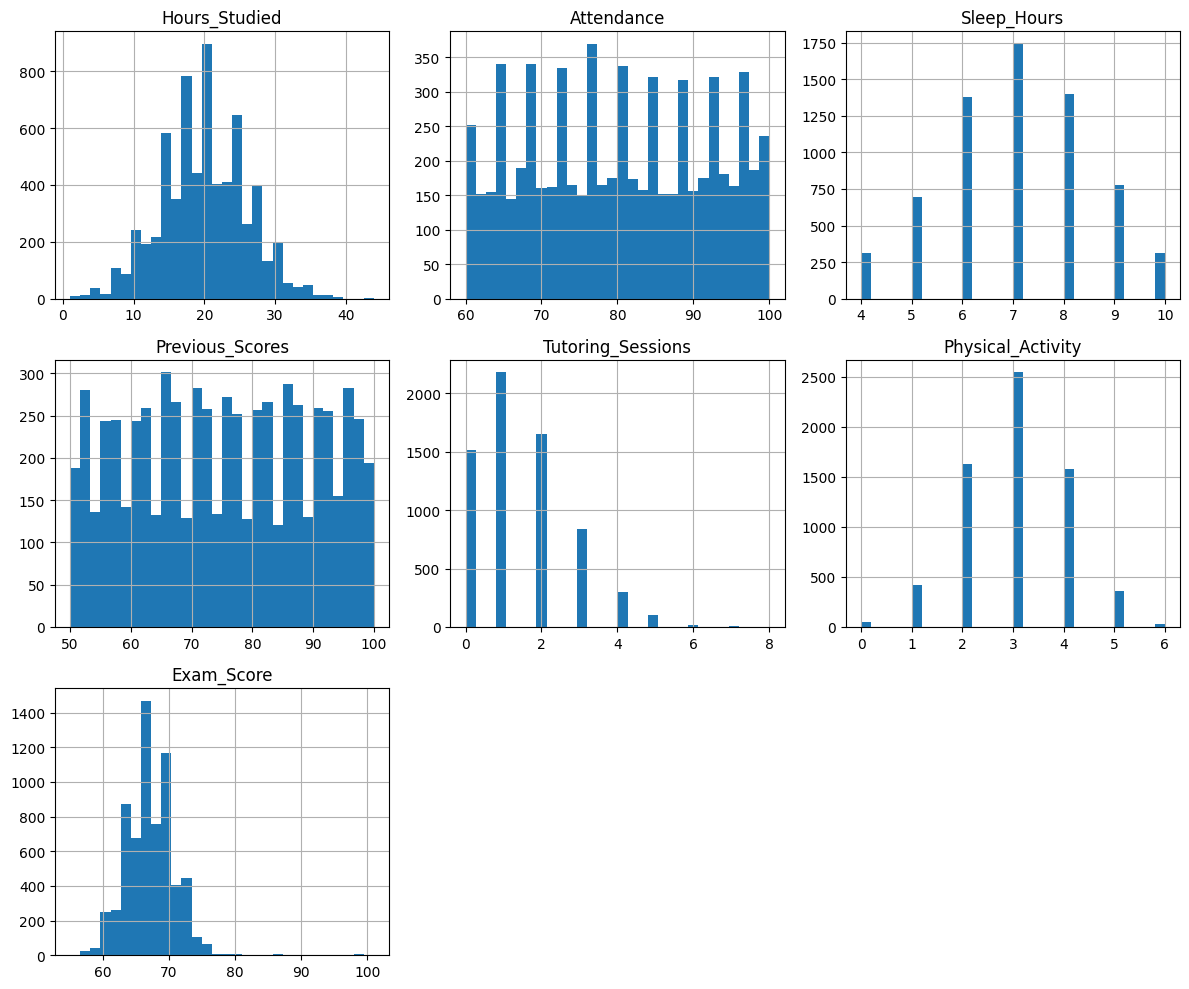

In [26]:
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


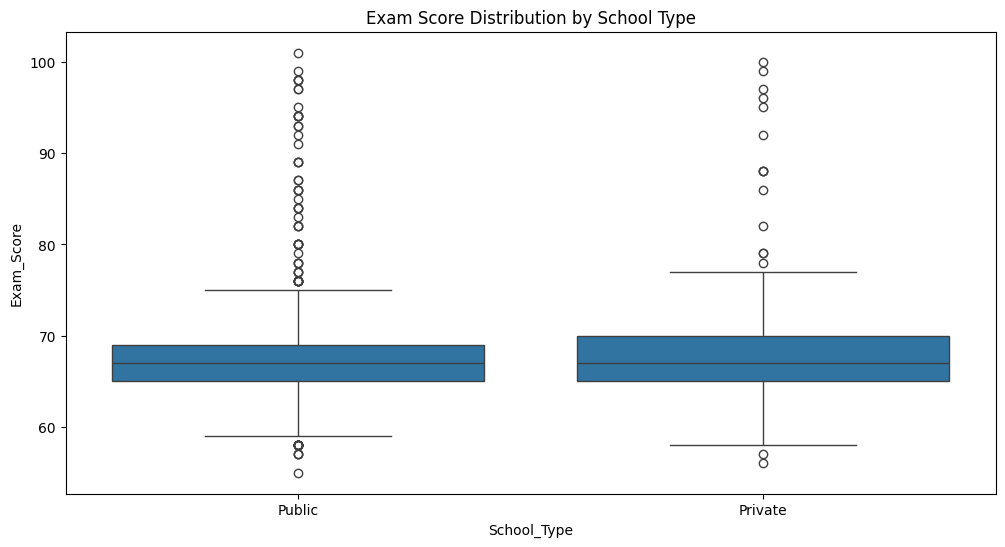

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='School_Type', y='Exam_Score')
plt.title('Exam Score Distribution by School Type')
plt.show()



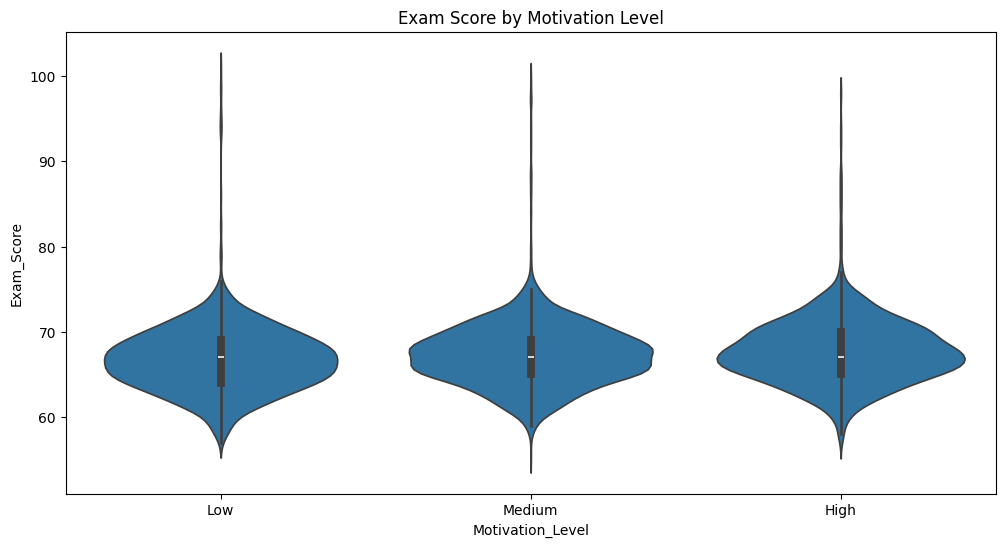

In [29]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Motivation_Level', y='Exam_Score')
plt.title('Exam Score by Motivation Level')
plt.show()


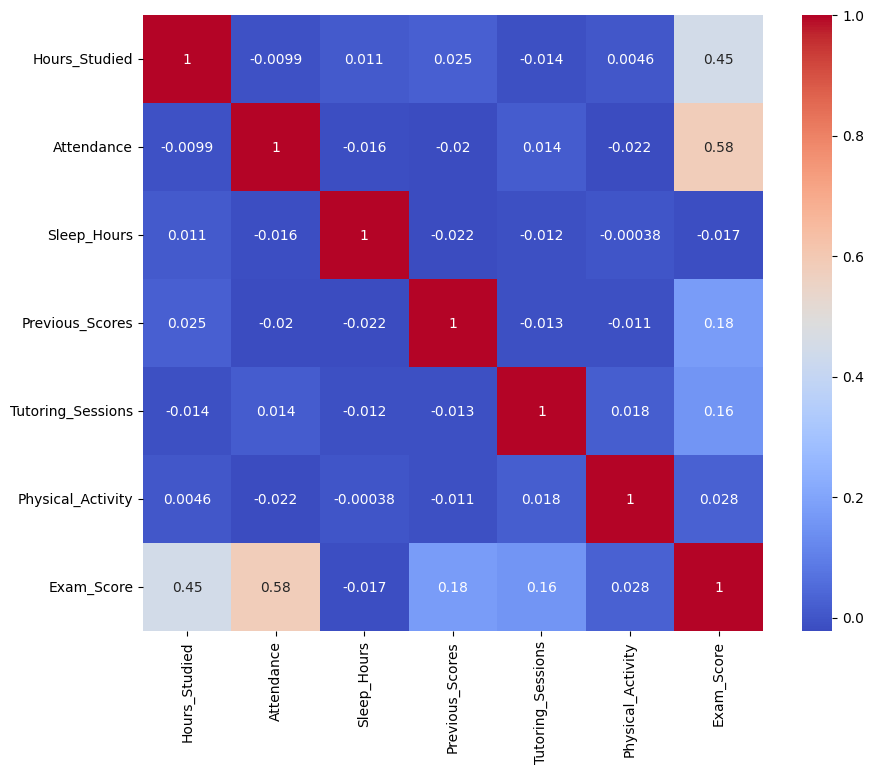

In [14]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix on the numeric columns
corr = numeric_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


# **Machine Learning**

## **Prepare the data**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop('Exam_Score', axis=1)  # Features
y = df_encoded['Exam_Score']               # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### **Linear Regression**

### Split the Data into Training and Testing Sets

In [19]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Standardize**

In [20]:
# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### **Train the Linear Regression Model**

In [21]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)


LinearRegression()

### **Lets make a Predictions**

In [22]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)


### **Evaluate the Model**

In [23]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression R² Score: {r2}')


Linear Regression Mean Squared Error: 3.2560199870428943
Linear Regression R² Score: 0.7696495724907312


### **Analyze Coefficients**

In [24]:
# Feature names
feature_names = X.columns

# Coefficients
coefficients = lr_model.coef_

# Combine feature names with their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of the coefficient
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance[['Feature', 'Coefficient']])


                                  Feature  Coefficient
1                              Attendance     2.290405
0                           Hours_Studied     1.756881
8                 Access_to_Resources_Low    -0.838966
6                Parental_Involvement_Low    -0.804623
3                         Previous_Scores     0.705908
4                       Tutoring_Sessions     0.626224
14                      Family_Income_Low    -0.544276
7             Parental_Involvement_Medium    -0.534638
20                Peer_Influence_Positive     0.516698
9              Access_to_Resources_Medium    -0.515775
11                   Motivation_Level_Low    -0.475959
25                Distance_from_Home_Near     0.419498
15                   Family_Income_Medium    -0.313811
16                    Teacher_Quality_Low    -0.301818
10         Extracurricular_Activities_Yes     0.285924
12                Motivation_Level_Medium    -0.276552
19                 Peer_Influence_Neutral     0.275653
17        

### **Visualize Actual vs. Predicted Values**

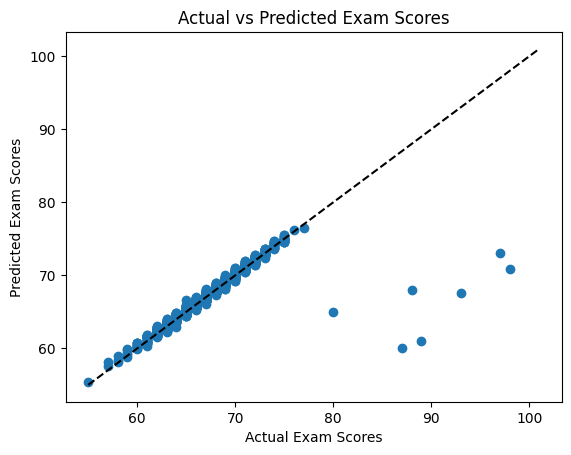

In [25]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')  # 45-degree line
plt.show()


# **Conclusion**

In this student performance analysis, we have applied the Linear Regression model in order to explore what factors drove exam scores. From the results, we will infer the following:

### **Significant Positive Influences:**

Among the factors, Attendance and Hours Studied turned out to be the strongest factors that positively influence exam scores. This reflects that regular attendance and putting enough hours into studying are the decisive factors in enhancing academic performance.

### **Detrimental Effects:**

Low Resource Availability and Low Parental Involvement were found to be high in terms of negative influence on the performance of students. Hence, educational institutions need to try harder to improvise in resource availability and involve parents more in the educational process.

### **Socioeconomic Factors:**

The study proved that Family Income and Quality of Teachers also occupy vital places in student achievement. A student coming from a low-income family or having poor-quality teaching has many obstacles to overcome, which may prove difficult in helping students achieve their academic potential.

### **Psychosocial Aspects:**
Motivation Levels and Peer Influence proved helpful for exam performance hence indicating a helping social environment combined with personal motivation is very crucial for getting good grades.

